# Heaps.

Heaps are a form of a binary tree. But the numbers are not distributed in the same way.
In the heap, each node has a number which is higher _(for a max heap)_ or lower _(for a min heap)_ than it's descendents. 

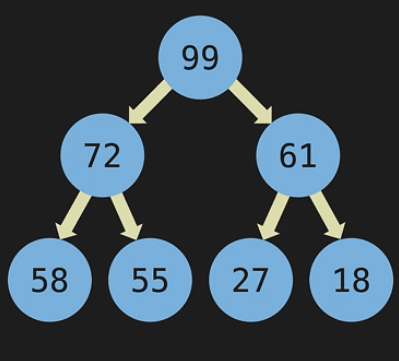

A key characteristic of a Heap is that is a complete tree. (It mean, it is filled from left to right without any gap.)
e.g. a INcomplete tree:

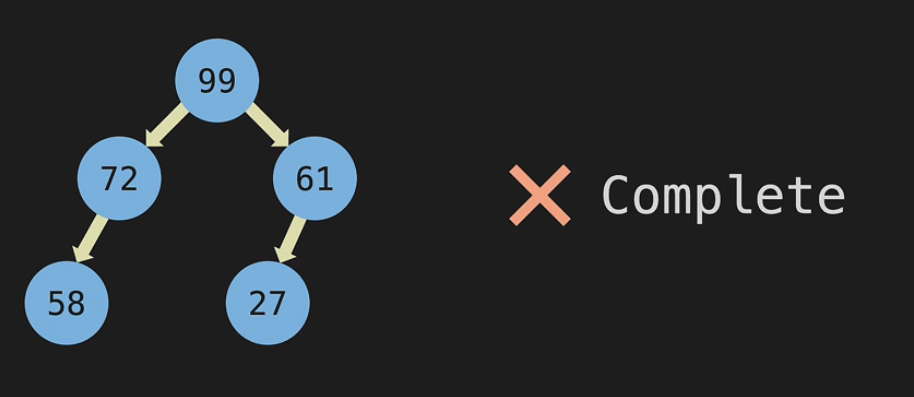


e.g. a complete tree:

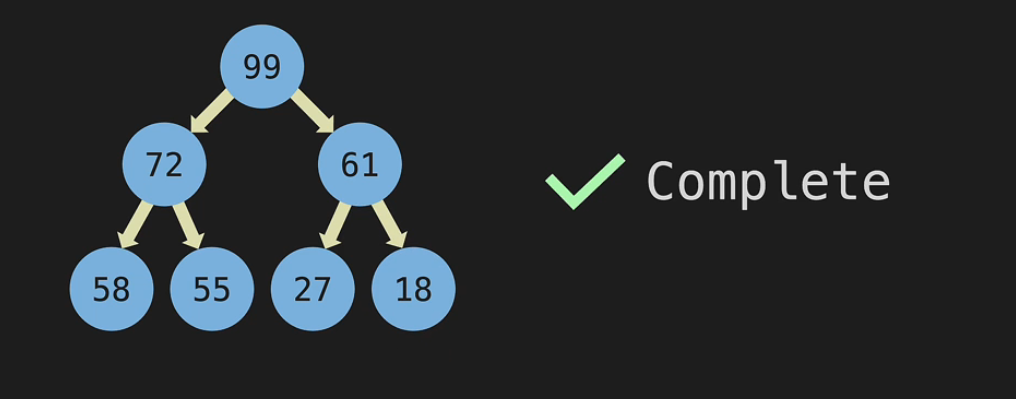


### Height of a tree

The height of a tree is log_2 n , if a tree has 8 nodes, then log_2(8) = 3, so the height of the tree is 3. *This is an important concept to understand.*


### Duplicates 

Another important thing to know about heaps is that I CAN have duplicates, so for instance, I can have a child node which is the same value as it's parent.

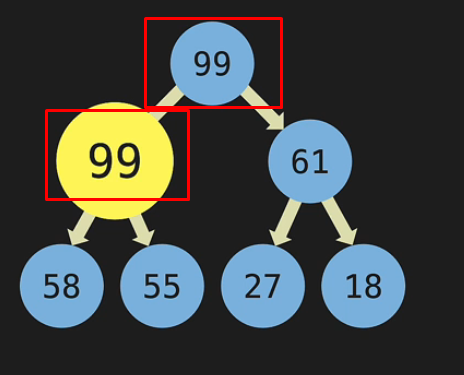


### Min / Max heap

What we have in the previuous diagrams is a MAX heap, which we have all the values in descendant order, all nodes are equal or lower than its parent.
But also we can have min heap, in which each node value is equal or higher than it's parent.

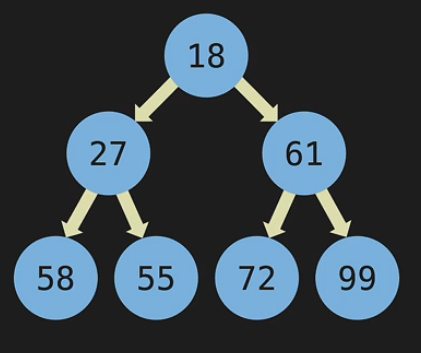


###

Other than have the maximum (or minimum), there is no garantee of the order of a heap. It mean, the left/right nodes could be either way.

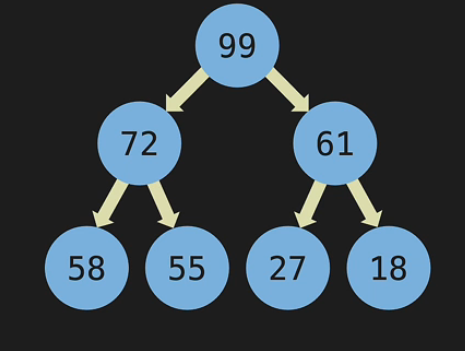
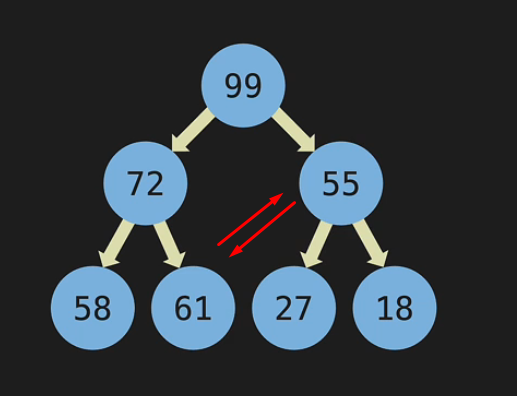
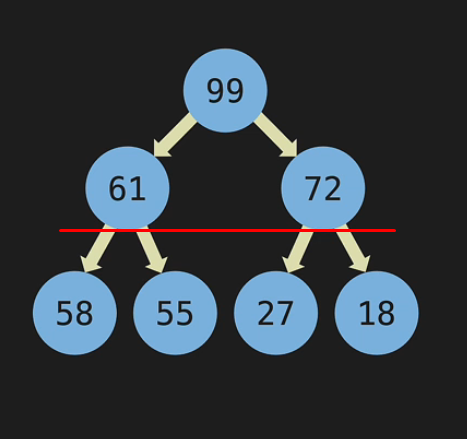

all the above are valid heaps.



## Heaps use case.

The heaps are used when you want to keep track of the larges (or minimum) item at the top and quickly remove it.
So there's also a hugo difference in how we store this tree in comparison with a binary search tree.

### Data structure of a heap

We're going to store the tree using lists, and only will store integers. 

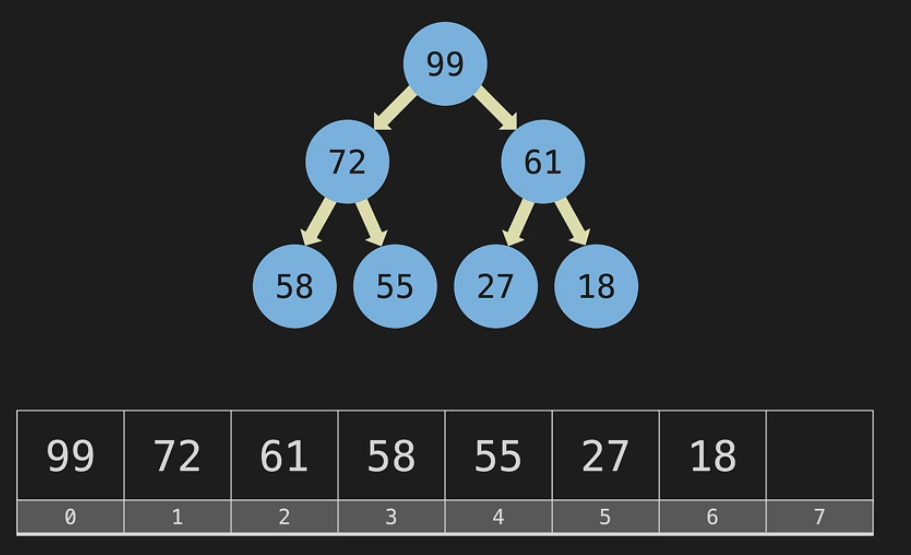


### Heaps: list structure
There are two philosophys in terms of how we store the heap values. 

It could be stored as the beginning of the list as the parent node (position 0). OR could be stored with the first index as None.

Usually it is constructed in the second way because of the maths involved in computing and accesing the Heap nodes.

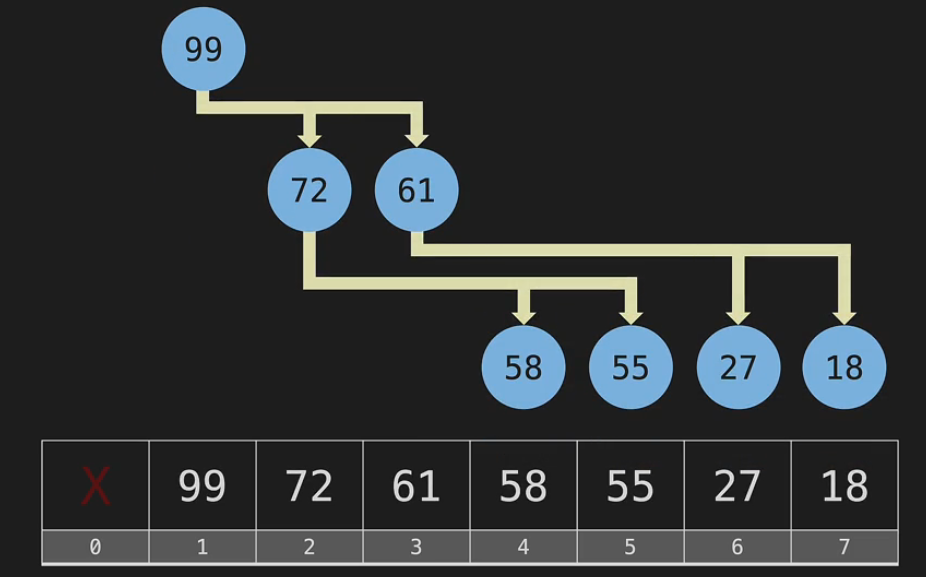


In this second form of storing the heaps, we could access the left and right childs of a specific node by:

- left_child = 2 * parent_index,

- right_child = 2 * parent_index + 1.

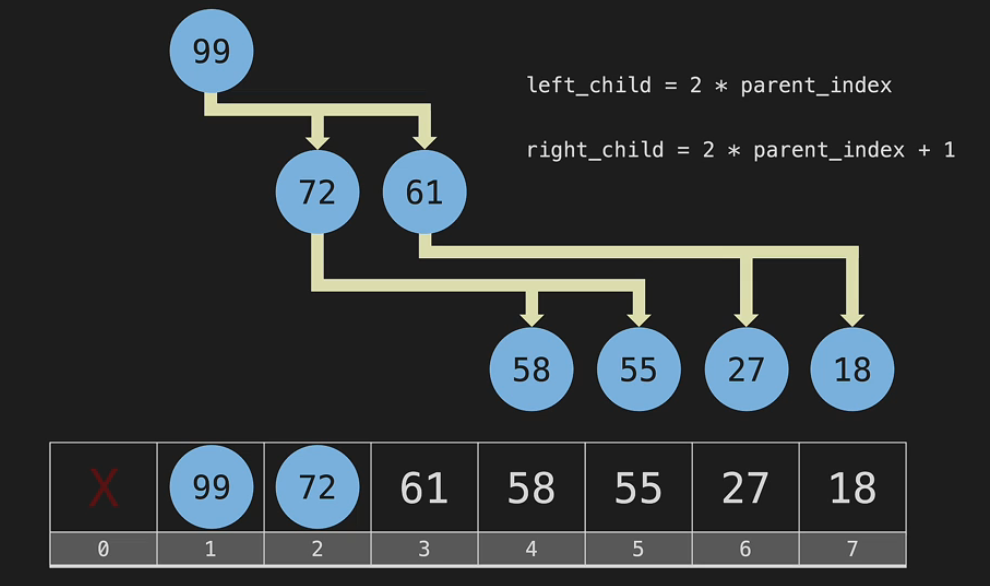


And for accessing the parent of a specific node is the opposite. Through an *integer* division.

- left_child_parent = left_child_index // 2.

- right_child_parent = right_child_index // 2.

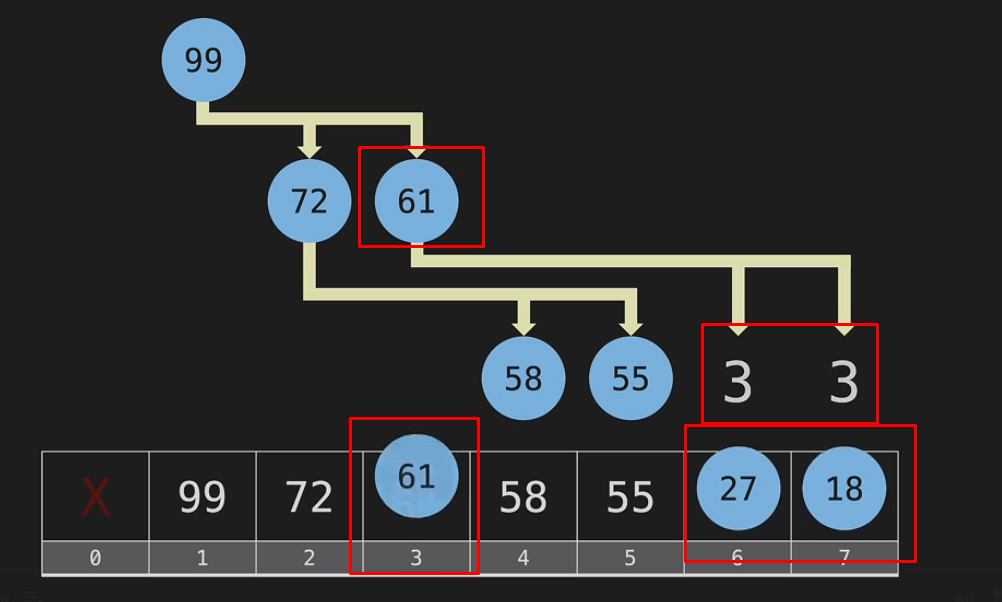



## Adding new elements into the heap.

Every time we add a new element into a heap, we will compare if the new element is greater (or minimum, depending of what type of heap we're talking about) than it's parent.
If we are handling a max heap, then we will compare through a while loop if the new element is greater than the parent. And that recursively until we reach the condition that the parent node nor doesn't exist or the condition of beign greater do not accomplish.

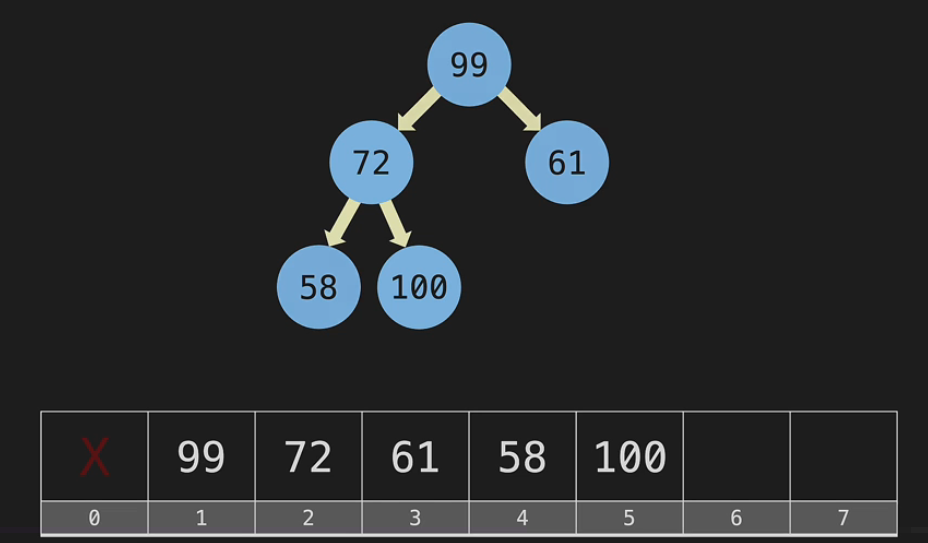
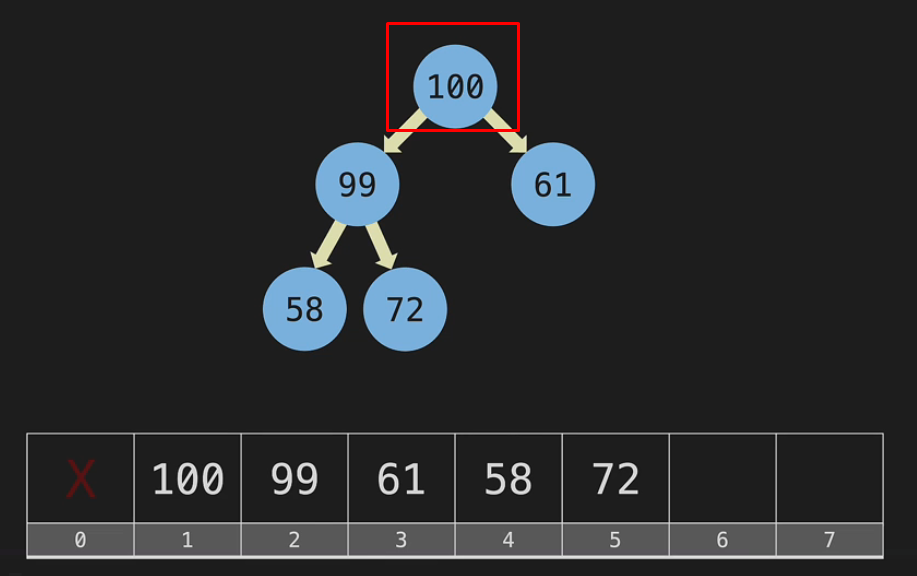




## Code

In [4]:
class MaxHeap:
    def __init__(self):
        self.heap = []

    def _left_child(self, index):
        return 2 * index + 1
    
    def _right_child(self, index):
        return 2 * index + 2
    
    def _parent(self, index):
        return (index - 1) // 2
    
    def _swap(self, index1, index2):
        """
        This methods change the value of the index1 to the current index2 and vice versa.
        It is for swapping the position of the values.
        """
        self.heap[index1], self.heap[index2]  =  self.heap[index2], self.heap[index1]

    
    def insert(self, value):
        self.heap.append(value)
        current = len(self.heap) - 1

        while current > 0 and self.heap[current] > self.heap[self._parent(current)]:
            self._swap(current, self._parent(current))
            current = self._parent(current)


if __name__ == "__main__":
    myheap = MaxHeap()
    myheap.insert(99)
    myheap.insert(72)
    myheap.insert(61)
    myheap.insert(58)
    print(myheap.heap)

    print("*"*20)
    myheap.insert(100)
    print(myheap.heap)


    print("*"*20)
    myheap.insert(75)
    print(myheap.heap)
    



[99, 72, 61, 58]
********************
[100, 99, 61, 58, 72]
********************
[100, 99, 75, 58, 72, 61]


### Removing the first element of a heap.

Remove the first element of a heap is a play of changing the removed position with the last right node in the heap.

So a way of doing that in one-shot in dragging the last child of the right side of the heap and put it into the removed first position.
Then, we will compare if the new value at the removed position is greater or minor than the childs, in case it's minor, then it gets swap, and so on until I balance my heap as it should.



In [6]:
class MaxHeap:
    def __init__(self):
        self.heap = []

    def _left_child(self, index):
        return 2 * index + 1
    
    def _right_child(self, index):
        return 2 * index + 2
    
    def _parent(self, index):
        return (index - 1) // 2
    
    def _swap(self, index1, index2):
        """
        This methods change the value of the index1 to the current index2 and vice versa.
        It is for swapping the position of the values.
        """
        self.heap[index1], self.heap[index2]  =  self.heap[index2], self.heap[index1]

    
    def insert(self, value):
        self.heap.append(value)
        current = len(self.heap) - 1

        while current > 0 and self.heap[current] > self.heap[self._parent(current)]:
            self._swap(current, self._parent(current))
            current = self._parent(current)


    def _sink_down(self, index):
        """
        Method that, after removing the first position of the heap, sorts the tree.
        """
        max_index = index 
        while True:
            left_index = self._left_child(index)
            right_index = self._right_child(index)

            # here I'm asking if my left child is greater than the current evaluated parent node.
            if (left_index < len(self.heap) and 
                    self.heap[left_index] > self.heap[max_index]):
                max_index = left_index
            
            # now I'm doing the same previous question but with the right node
            if (right_index < len(self.heap) and 
                    self.heap[right_index] > self.heap[max_index]):
                max_index = right_index

            # here I'm asking if after doing my comparision with the childs, if the -
            #   evaluated parent node is still the max value, if not, it gets swap.
            if max_index != index:
                self._swap(index, max_index)
                index = max_index
            else:
                return 
            
    def remove(self):
        """
        Removing method that also checks border cases.
        """
        if len(self.heap) == 0:
            return None 
        if len(self.heap) == 1:
            return self.heap.pop()
        
        max_value = self.heap[0]
        self.heap[0] = self.heap.pop()
        self._sink_down(0)

        return max_value



if __name__ == "__main__":
    myheap = MaxHeap()
    myheap.insert(95)
    myheap.insert(75)
    myheap.insert(80)
    myheap.insert(55)
    myheap.insert(60)
    myheap.insert(50)
    myheap.insert(65)
    print(myheap.heap)

    print("*"*20)
    myheap.remove()
    print(myheap.heap)

    print("*"*20)
    myheap.remove()
    print(myheap.heap)


    print("*"*20)



    



[95, 75, 80, 55, 60, 50, 65]
********************
[80, 75, 65, 55, 60, 50]
********************
[75, 60, 65, 55, 50]
********************


## Heap: Big O and Priority queues

A priority queue is, if you define the highest value as the highest priority and you use case will relay heavily on remove the high value from the queue, then a Heap is a great way of doing this. Then a Heap is an amazing way of doing this because you will always have the highest value at the top of the structure and the operation will be very efficiently.

Technically, other data structures such a linked list also could be used for priority queues, but doing this in this way will be far less efficient than using a heap. So the reason of use a Heap is a big O decision. 

Another thing it is possible to use is a dictionary, and you could access to the highest value in O(1), but only will work that way if you previously know what specific value you're looking for, otherway, you will need to iterate over the entire dictionary to determine that and that will be O(n).

A binary search tree is another structure that could be used, if the tree is balanced the highest value will be always as the last node of the right side, so it would be O(log n) as well as add a new value. But that escentially is the problem there are not always balanced, so in worst case scneario the complexity for adding or removing a value from the tree is O(n).

In Heaps, as they're balanced, the farthest it is possible to transverse is O(log_2 n). Also if you add an item, the farthest it needed to travel is O(log_2 n).
And O(log n) is extremely efficient. 

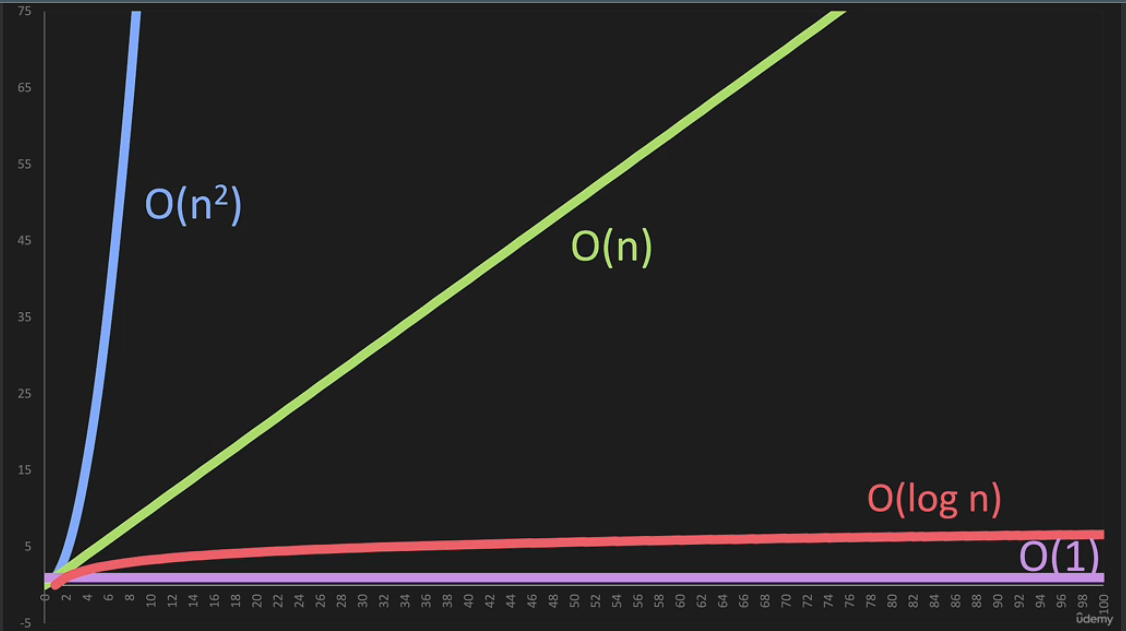

